**Численное решение нелинейных уравнений**

**1)Метод деления отрезка пополам (метод бисекции)**

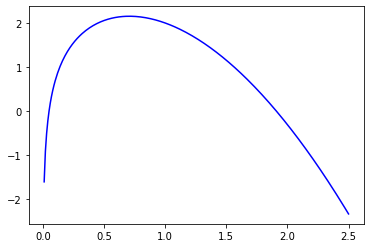

x values:
[0.049913063049316406, 1.9096946716308594]
y check values:
[3.6160208212114575e-05, 9.632639734746817e-06]


In [1]:
import math 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
 
def f(x):
  return (math.log(x) + 3 - x**2)
 
def bisection(f, a, b, eps=10e-9):
  x = 0
  x_list = []
  n = math.ceil( math.log( (b-a)/(2*eps) ) )
 
  for i in range(n):
    x = (a + b)/2
    x_list.append(x)
 
    if f(a)*f(x) < 0:
      b = x
    elif f(a)*f(x) > 0:
      a = x
    else:
      break
  
  return x, n, x_list
 
f_graph_coordinates = [f(x) for x in np.arange(0.01, 2.5, 0.01)]
 
fig, ax = plt.subplots()
ax.plot( np.arange(0.01, 2.5, 0.01), f_graph_coordinates, color='b' )
plt.show()
 
a1 = 0.01
b1 = 0.5
 
a2 = 1.5
b2 = 2.5
 
x1, _, _ = bisection(f, a1, b1)
x2, _, _ = bisection(f, a2, b2)
 
print('x values:')
print([x1,x2])
 
print('y check values:')
print([f(x1),f(x2)])

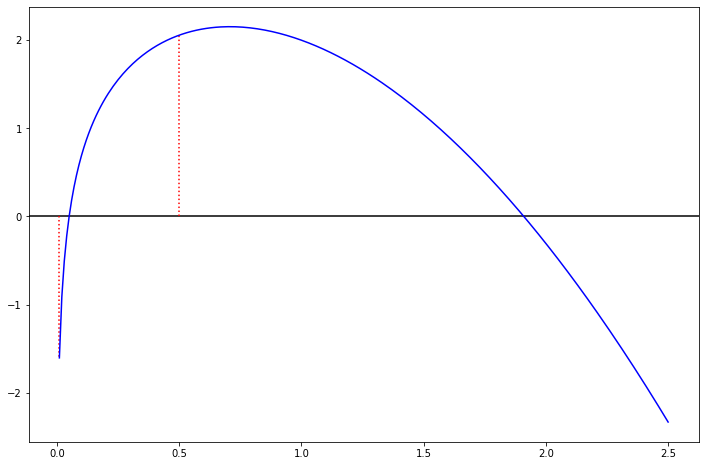

In [ ]:
import matplotlib.animation as animation

from matplotlib import rc
rc('animation', html='jshtml')

plt.rcParams['figure.figsize'] = [12, 8]

a = a1
b = b1
_, n, x_list = bisection(f, a, b, 10e-5)

fig, ax = plt.subplots()

ax.axhline(y = 0, color = 'k')

ax.plot([a, a], [0, f(a)], 'r:')
ax.plot([b, b], [0, f(b)], 'r:')


f_graph_coordinates = [f(x) for x in np.arange(0.01, 2.5, 0.01)]

ax.plot( np.arange(0.01, 2.5, 0.01), f_graph_coordinates , color='b')
plt.show()

def animate(i):
  x_i = x_list[i]
  f_i = f(x_i)
  ax.plot([x_i, x_i], [0, f_i], 'r:')
  ax.plot(x_i, f_i, 'ro')

animation.FuncAnimation(fig, animate, frames=n)

## **2) Метод секущих**

In [ ]:
def secant(f, x1, x2, eps=10e-9, max_iter=100):
  x = 0
  n = 0
  x_list = [x1, x2]

  while ( math.fabs( x_list[n+1] - x_list[n] ) > eps ) and ( n <= max_iter ):
    x = ( x_list[n] * f( x_list[n+1] ) - x_list[n+1] * f( x_list[n] ) ) / ( f( x_list[n+1] ) - f( x_list[n] ) )
    x_list.append(x)
    n+=1

  return x, n, x_list

a1 = 0.01 #НЕ РАБОТАЕТ
b1 = 0.5 #НЕ РАБОТАЕТ

a2 = 1
b2 = 2.5

# x1, _, _ = secant(f, a1, b1) НЕ ПОЛУЧАЕТСЯ НАЙТИ ЭТИМ СПОСОБОМ, т.к ВЫВАЛИВАЕТСЯ ЗА ОБЛАСТЬ ОПРЕДЕЛЕНИЯ!!!
x2, _, _ = secant(f, a2, b2)

print('x values:')
print(x2)

print('y check values:')
print(f(x2))

x values:
1.9096975943778494
y check values:
-4.440892098500626e-16


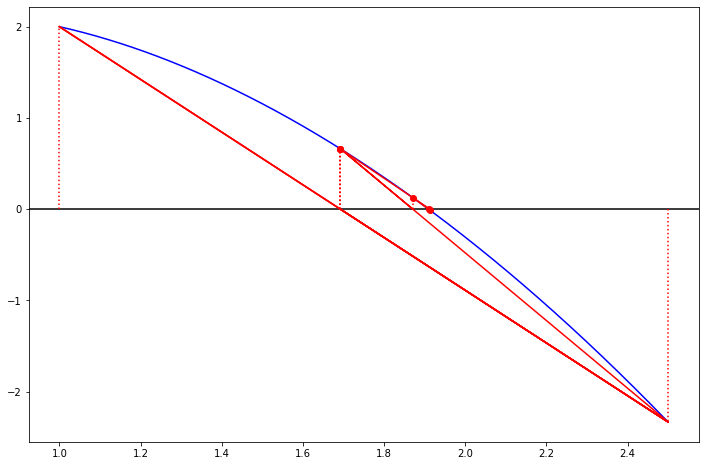

In [ ]:
rc('animation', html='jshtml')
plt.rcParams['figure.figsize'] = [12, 8]

a = a2
b = b2
_, n, x_list = secant(f, a, b, 10e-3)

fig, ax = plt.subplots()

ax.axhline(y = 0, color = 'k')
ax.plot([a, a], [0, f(a)], 'r:')
ax.plot([b, b], [0, f(b)], 'r:')

xx = np.arange(a, b, 10e-4)
yy = np.vectorize(f)(xx)
ax.plot(xx, yy, 'b')

def animate(i):
  i += 2
  x1, x2 = x_list[i - 2 : i]
  ax.plot([x1, x2, x_list[i]], [f(x1), f(x2), 0], 'r')
  ax.plot([x_list[i], x_list[i]], [0, f(x_list[i])], 'r:')
  ax.plot(x_list[i], f(x_list[i]), 'ro')

animation.FuncAnimation(fig, animate, frames=n)

## 3)Метод Ньютона (метод касательных)



In [ ]:
from sympy import *

x = symbols('x')

df_expr = diff(ln(x) + 3 - x**2)

df = lambdify([x], df_expr)

def newton(f, df, x0, eps=10e-9):
    x = 0
    n = 0
    x_list = [x0]
    while math.fabs(x - x0) > eps:
        x = x0 - f(x0) / df(x0)
        x_list.append(x)
        x0 = x
        n += 1
    return x, n, x_list


a1 = 0.01
b1 = 0.5

a2 = 1.5
b2 = 2.5

x0_1 = bisection(f, a1, b1, eps=0.01)[0]
x0_2 = bisection(f, a2, b2, eps=0.01)[0]

x1, _, _ = newton(f, df, x0_1) 
x2, _, _ = newton(f, df, x0_2) 

print('x values:')
print([x1,x2])

print('y check values:')
print(f(x1),f(x2))

x values:
[0.04898160324569476, 1.9099586717849346]
y check values:
-0.01870969279017346 -0.0008605239109686913


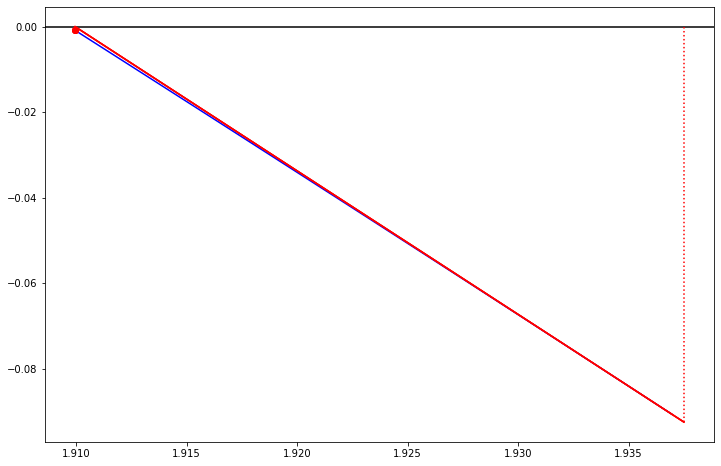

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')
plt.rcParams['figure.figsize'] = [12, 8]

fig, ax = plt.subplots()

x0 = x0_2

x, n, x_list = newton(f, df, x0, 10e-3)

xx = np.arange(min(x_list), max(x_list), 10e-4)
yy = np.vectorize(f)(xx)
ax.plot(xx, yy, 'b')

ax.axhline(y = 0, color = 'k')
ax.plot([x0, x0], [0, f(x0)], 'r:')

def animate(i):
  prev, cur = x_list[i], x_list[i + 1]
  ax.plot([prev, cur], [f(prev), 0], 'r')
  ax.plot([cur, cur], [0, f(cur)], 'r:')
  ax.plot(cur, f(cur), 'ro')

animation.FuncAnimation(fig, animate, frames=n)